<a href="https://colab.research.google.com/github/Asfak21/Bluetooth_Siqnal_Prediction_at_ExamHall/blob/main/Bluetooth_Siqnal_Prediction_at_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import math

# For Data visualizations package
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})

# importing missingo library which helps us to visualize the missing values
import missingno as msno

from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Lets import the csv file
#file_path =
df = pd.read_csv('/content/drive/My Drive/Self_project/iBeacon_RSSI_Labeled.csv')
df1 = pd.read_csv('/content/drive/My Drive/Self_project/iBeacon_RSSI_Unlabeled.csv')

In [5]:
df.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


In [6]:
df1.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,?,11-7-2016 12:29:01,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,?,11-7-2016 12:29:00,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,?,11-7-2016 12:28:59,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,?,11-7-2016 12:28:58,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,?,11-7-2016 12:28:57,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [9]:
df.shape

(1420, 15)

In [10]:
df1.shape

(5191, 15)

In [12]:
# Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  1420 non-null   object
 1   date      1420 non-null   object
 2   b3001     1420 non-null   int64 
 3   b3002     1420 non-null   int64 
 4   b3003     1420 non-null   int64 
 5   b3004     1420 non-null   int64 
 6   b3005     1420 non-null   int64 
 7   b3006     1420 non-null   int64 
 8   b3007     1420 non-null   int64 
 9   b3008     1420 non-null   int64 
 10  b3009     1420 non-null   int64 
 11  b3010     1420 non-null   int64 
 12  b3011     1420 non-null   int64 
 13  b3012     1420 non-null   int64 
 14  b3013     1420 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 166.5+ KB


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5191 entries, 0 to 5190
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  5191 non-null   object
 1   date      5191 non-null   object
 2   b3001     5191 non-null   int64 
 3   b3002     5191 non-null   int64 
 4   b3003     5191 non-null   int64 
 5   b3004     5191 non-null   int64 
 6   b3005     5191 non-null   int64 
 7   b3006     5191 non-null   int64 
 8   b3007     5191 non-null   int64 
 9   b3008     5191 non-null   int64 
 10  b3009     5191 non-null   int64 
 11  b3010     5191 non-null   int64 
 12  b3011     5191 non-null   int64 
 13  b3012     5191 non-null   int64 
 14  b3013     5191 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 608.4+ KB


In [15]:
#Duplicated value
df.duplicated().sum()

0

In [16]:
df1.duplicated().sum()

0

In [20]:
#Missing Values/Null Values
df.isnull().sum()

location    0
date        0
b3001       0
b3002       0
b3003       0
b3004       0
b3005       0
b3006       0
b3007       0
b3008       0
b3009       0
b3010       0
b3011       0
b3012       0
b3013       0
dtype: int64

In [21]:
df1.isnull().sum()

location    0
date        0
b3001       0
b3002       0
b3003       0
b3004       0
b3005       0
b3006       0
b3007       0
b3008       0
b3009       0
b3010       0
b3011       0
b3012       0
b3013       0
dtype: int64

<Axes: >

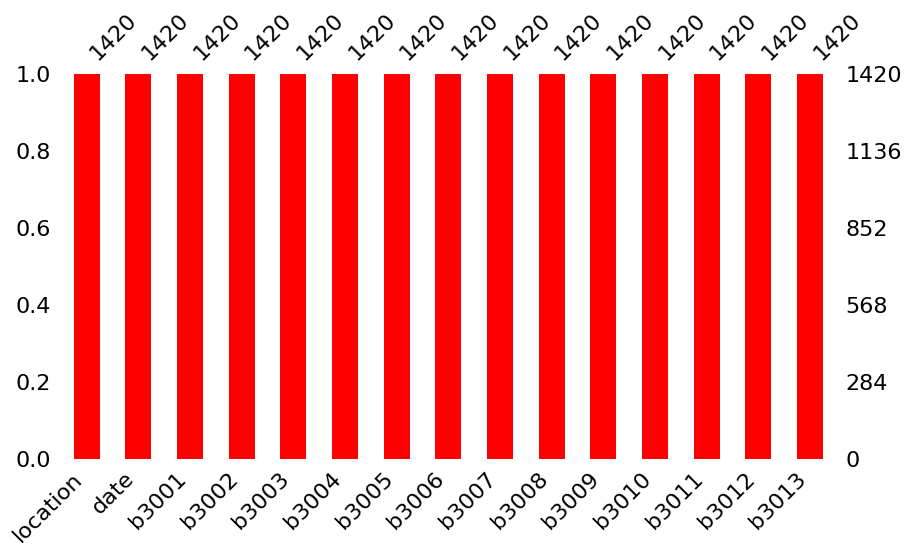

In [27]:
## Visualizing the missing values
msno.bar(df,figsize= (10,5), color = 'red')

<Axes: >

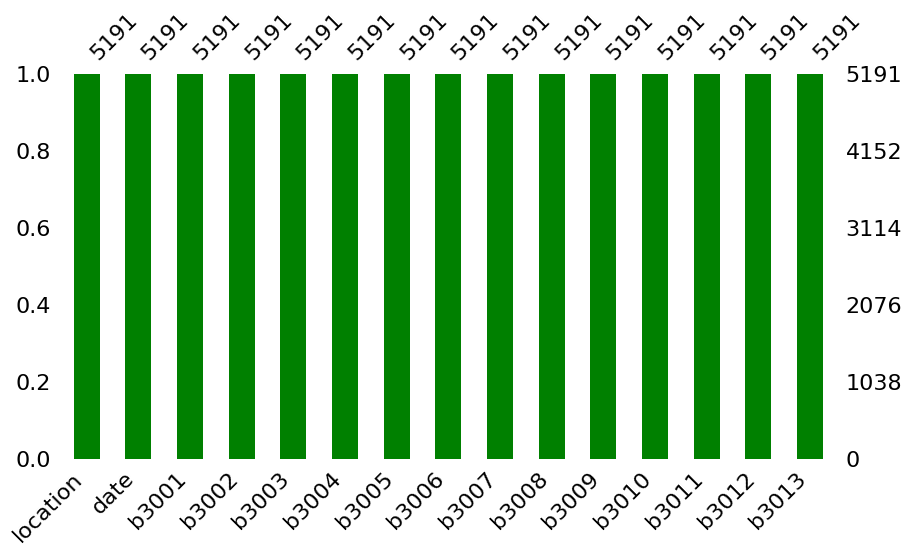

In [26]:
msno.bar(df1,figsize= (10,5), color = 'Green')

In [29]:
## Dataset Columns
df.columns.to_list()

['location',
 'date',
 'b3001',
 'b3002',
 'b3003',
 'b3004',
 'b3005',
 'b3006',
 'b3007',
 'b3008',
 'b3009',
 'b3010',
 'b3011',
 'b3012',
 'b3013']

In [30]:
df1.columns.to_list()

['location',
 'date',
 'b3001',
 'b3002',
 'b3003',
 'b3004',
 'b3005',
 'b3006',
 'b3007',
 'b3008',
 'b3009',
 'b3010',
 'b3011',
 'b3012',
 'b3013']

In [33]:
# Dataset describe
df.describe(include= 'all')

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,1420,1420,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
unique,105,1420,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,K04,10-18-2016 11:15:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-197.825352,-156.623944,-175.533099,-164.534507,-178.378169,-175.063380,-195.637324,-191.970423,-197.145070,-197.442254,-197.748592,-197.233803,-196.065493
std,NaN,NaN,16.259105,60.217747,49.452958,56.523261,47.175799,49.596627,22.880980,30.733742,19.160207,17.741632,16.852535,18.541088,22.053924
min,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
50%,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
75%,NaN,NaN,-200.000000,-78.000000,-200.000000,-80.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000


In [34]:
df1.describe(include = 'all')

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
count,5191,5191,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.000000,5191.00000,5191.000000,5191.000000
unique,1,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,?,11-7-2016 12:29:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5191,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-179.238682,-166.233674,-181.122327,-183.614910,-158.049701,-157.634175,-185.345983,-169.053747,-184.328838,-185.461183,-187.83953,-190.068002,-188.238104
std,NaN,NaN,45.321908,54.078027,42.953228,40.498886,57.019260,57.497039,39.557530,51.313281,40.940442,38.361122,35.57793,32.751981,35.883916
min,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000
25%,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000
50%,NaN,NaN,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000
75%,NaN,NaN,-200.000000,-90.500000,-200.000000,-200.000000,-84.000000,-83.000000,-200.000000,-103.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000


In [41]:
# Check Unique Values for each variable.
for i in df.columns.to_list():
  print(f"'{i}' : {df[i].nunique()}")

'location' : 105
'date' : 1420
'b3001' : 14
'b3002' : 31
'b3003' : 32
'b3004' : 30
'b3005' : 21
'b3006' : 24
'b3007' : 18
'b3008' : 26
'b3009' : 21
'b3010' : 14
'b3011' : 18
'b3012' : 19
'b3013' : 20


In [42]:
for i in df1.columns.to_list():
  print(f"'{i}' : {df1[i].nunique()}")

'location' : 1
'date' : 5191
'b3001' : 47
'b3002' : 47
'b3003' : 47
'b3004' : 47
'b3005' : 52
'b3006' : 55
'b3007' : 48
'b3008' : 50
'b3009' : 50
'b3010' : 49
'b3011' : 52
'b3012' : 49
'b3013' : 50
